
# **Assignment - 2: Basic Data Understanding**

---

This assignment will get you familiarized with Python libraries and  functions required for data visualization.

---
## Part 1 - Loading data 
---

###Import the following libraries:  

* ```numpy``` with an alias name ```np```, 
* ```pandas``` with an alias name ```pd```, 
* ```matplotlib.pyplot``` with an alias name ```plt```, and 
* ```seaborn``` with an alias name ```sns```. 

In [0]:
# Load the four libraries with their aliases 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Using the files ```train.csv``` and ```moviesData.csv```,  peform the following:

* Load these file as ```pandas``` dataframes and store it in variables named ```df``` and ```movies``` respectively. 
* Print the first ten rows of ```df```. 



In [0]:
# Load the file as a dataframe 
url1 = 'https://raw.githubusercontent.com/shala2020/shala2020.github.io/master/Lecture_Materials/Assignments/DataScience/L2/train.csv'
url2 ='https://raw.githubusercontent.com/shala2020/shala2020.github.io/master/Lecture_Materials/Assignments/DataScience/L2/moviesData.csv'
df = pd.read_csv(url1)
movies=pd.read_csv(url2)

In [0]:
# Print the first ten rows of df
df.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,ID
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5,0
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7,1
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0,2
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0,3
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2,4
5,32,0,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,4,Male,79,3,1,Laboratory Technician,4,Single,3068,11864,0,No,13,3,3,0,8,2,2,7,7,3,6,5
6,59,0,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,3,Female,81,4,1,Laboratory Technician,1,Married,2670,9964,4,Yes,20,4,1,3,12,3,2,1,0,0,0,6
7,30,0,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,4,Male,67,3,1,Laboratory Technician,3,Divorced,2693,13335,1,No,22,4,2,1,1,2,3,1,0,0,0,7
8,38,0,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,4,Male,44,2,3,Manufacturing Director,3,Single,9526,8787,0,No,21,4,2,0,10,2,3,9,7,1,8,8
9,36,0,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,3,Male,94,3,2,Healthcare Representative,3,Married,5237,16577,6,No,13,3,2,2,17,3,2,7,7,7,7,9


### Using the dataframe ```df```, perform the following: 

* Print the first five rows of the column ```MonthlyRate```. 
* Find out the details of the column ```MonthlyRate``` like mean, maximum value, minimum value, etc. 

In [0]:
# Print the first five rows of MonthlyRate
MRate=df.MonthlyRate.iloc[0:5] 
MRate

0    19479
1    24907
2     2396
3    23159
4    16632
Name: MonthlyRate, dtype: int64

In [0]:
# Find the details of MonthlyRate 
MRate.describe()

count        5.000000
mean     17314.600000
std       8937.515667
min       2396.000000
25%      16632.000000
50%      19479.000000
75%      23159.000000
max      24907.000000
Name: MonthlyRate, dtype: float64

---
## Part 2 - Cleaning and manipulating data 
---

### Using the dataframe ```df```, peform the following:

* Check whether there are any missing values in ```df```. 
* If yes, drop those values and print the size of ```df``` after dropping these. 

In [0]:
# Check for missing values 
print(df.isna().sum())

# Drop the missing values 


# Print the size of df after dropping 
print(df.shape)


Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
ID        

### Using the dataframe ```df```, peform the following:

* Add another column named ```MonthRateNew``` in ```df``` by subtracting the mean from ```MonthlyRate``` and dividing it by standard deviation. 

In [0]:
# Add a column named MonthRateNew 
MonthRateNew=(df.MonthlyRate-df.MonthlyRate.mean())/df.MonthlyRate.std()
df['MonthRateNew'] = MonthRateNew
print(df)


NameError: ignored

### Using the dataframe ```movies```, perform the following: 

* Check whether there are any missing values in ```movies```. 
* Find out the number of observations/rows having any of their features/columns missing. 
* Drop the missing values and print the size of ```movies``` after dropping these. 
* Instead of dropping the missing values, replace the missing values by their mean (or some suitable value). 


In [0]:
# Check for missing values 
print(movies.isna().sum())
# Drop the missing values 
movies_drop=movies
movies_drop = movies_drop.dropna() 
movies_drop.shape
# Replace the missing values 
# You can use SimpleImputer of sklearn for this
# from sklearn.impute import SimpleImputer
x=0
for i in range(0,movies.shape[1]):
  if movies[movies.columns[i]].isna().sum() > 0:     
    if movies.columns[i] =='dvd_rel_year':
      movies.dvd_rel_year=movies.thtr_rel_year
    if movies.columns[i] =='dvd_rel_month':
      movies.dvd_rel_month =movies.thtr_rel_month
    if movies.columns[i] =='dvd_rel_day':
      movies.dvd_rel_day=movies.thtr_rel_day
    if movies.columns[i] =='runtime': 
      imputer=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
      imputer = imputer.fit(movies[['runtime']])
      movies[['runtime']] = imputer.transform(movies[['runtime']]).ravel()
    if movies.columns[i] =='studio':  
      imputer=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
      imputer = imputer.fit(movies[['studio']])
      movies[['studio']] = imputer.transform(movies[['studio']]).ravel()
        
print(movies.isna().sum())

---
## Part 3 - Visualizing data 
---

### Visualize the ```df``` by drawing the following plots:

* Plot a histogram of ```Age``` and find the range in which most people are there. 
* Modify the histogram of ```Age``` by adding 30 bins. 
* Draw a scatter plot between ```Age``` and ```Attrition``` and suitable labels to the axes. Find out whether people more than 50 years are more likely to leave the company. (```Attrition``` = 1 means people have left the company). 

Range of age where max people are present 30.6 to 34.8


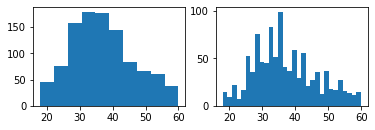

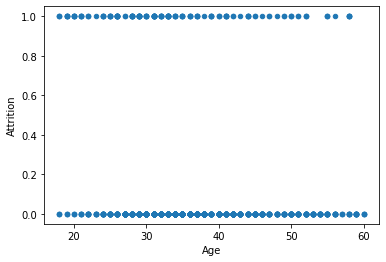

In [0]:
# Plot and modify the histogram of Age
plt.subplot(2,2,1)
plt.hist(df.Age)
hist,bin_edges = np.histogram(df.Age)
# print(bin_edges)
x=np.argmax(hist)
print("Range of age where max people are present %s to %s"%(bin_edges[x],bin_edges[x+1]))
plt.subplot(2,2,2)
plt.hist(df.Age, bins = 30)

# Draw a scatter plot between Age and Attrition
df.plot.scatter(x="Age",y="Attrition")


### Visualize the ```df``` by following the steps given below:

* Get a series containing counts of unique values of ```Attrition```.
* Draw a countplot for ```Attrition``` using ```sns.countplot()```. 

No. of ones and zeros 172 and 856 respectively 


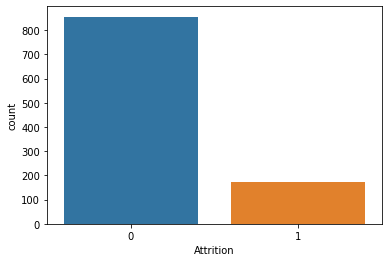

In [0]:
# Get a series of counts of values of Attrition
ones=df['Attrition'].values.sum()
zeros=len(df.Attrition)-ones
attrition_plot=(zeros,ones)
print('No. of ones and zeros %s and %s respectively '%(ones,zeros))
# Draw a countplot for Attrition 
# You may use countplot of seaborn for this 
sns.countplot(df.Attrition)


### Visualize the ```df``` by following the steps given below:

* Draw a cross tabulation of ```Attrition``` and ```BusinessTravel``` as bar charts. Find which value of ```BusinessTravel``` has highest number of people.

3
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Attrition            0    1
BusinessTravel             
Non-Travel          92   10
Travel_Frequently  150   47
Travel_Rarely      614  115


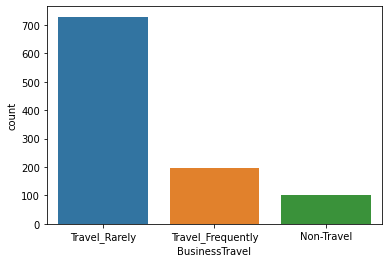

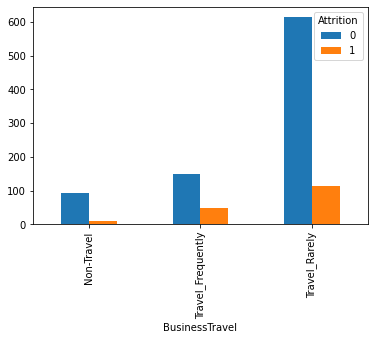

In [0]:
# Draw a cross tab of Attritiona and BusinessTravel 
# You may use crosstab of pandas for this 
p = sns.countplot(data=df, x = 'BusinessTravel')
num_travels= df["BusinessTravel"].nunique()
travels = df["BusinessTravel"].unique()
print(num_travels)
print(travels)
x=pd.crosstab(df.BusinessTravel, df.Attrition)
print(x)
z=x.plot.bar()
plt.legend(title='Attrition')


### Visualize the ```df``` by drawing the following plot:

* Draw a stacked bar chart between ```Attrition``` and ```Gender``` columns. 

Attrition    0    1
Gender             
Female     364   67
Male       492  105


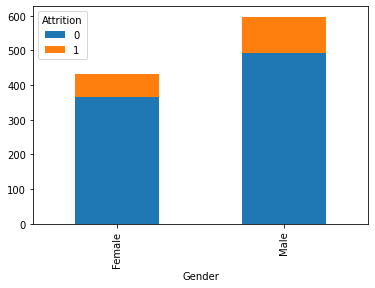

In [0]:
# Draw a stacked bar chart between Attrition and Gender 
y=pd.crosstab(df.Gender, df.Attrition)
print(y)
z=y.plot.bar(stacked=True)
plt.legend(title='Attrition')

### Visualize the ```df``` by drawing the following histogram:

* Draw a histogram of ```TotalWorkingYears``` with 30 bins. 
* Draw a histogram of ```YearsAtCompany``` with 30 bins and find whether the values in ```YearsAtCompany``` are skewed. 

Skewness is 1.7724925350968725 ie more weight towards left of data 


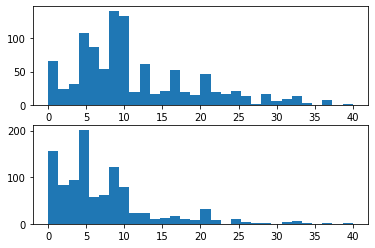

In [0]:
# Draw a histogram of TotalWorkingYears with 30 bins
plt.subplot(2,1,1)
plt.hist(df.TotalWorkingYears, bins = 30)

# Draw a histogram of YearsAtCompany
plt.subplot(2,1,2)
plt.hist(df.YearsAtCompany, bins = 30)
if df['YearsAtCompany'].skew()>0:
  print("Skewness is %s ie more weight towards left of data "%df['YearsAtCompany'].skew())
elif df['YearsAtCompany'].skew()<0:
  print("Skewness is %s ie more weight towards right of data "%df['YearsAtCompany'].skew())
else:
  print("Skewness is 0 ie normal distribution ")   

### Visualize the ```df``` by drawing the following boxplot:

* Draw a boxplot of ```MonthlyIncome``` for each ```Department``` and report whether there is/are outlier(s). 


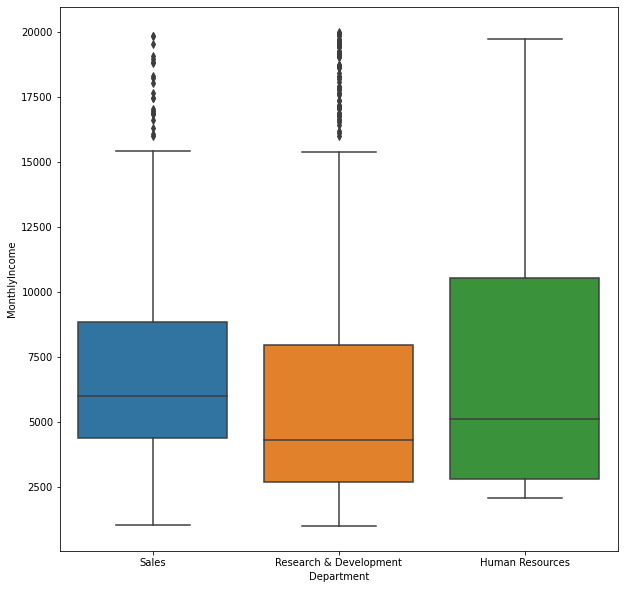

In [0]:
# Draw a boxplot of MonthlyIncome for each Department and report outliers 
plt.figure(figsize=(10,10))
Income_variation = sns.boxplot(df['Department'], df['MonthlyIncome'])


### Visualize the ```df``` by drawing the following piechart:

* Create a pie chart of the values in ```JobRole``` with suitable label and report which role has highest number of persons. 

Sales Executive              223
Research Scientist           209
Laboratory Technician        183
Manufacturing Director       105
Healthcare Representative     85
Manager                       79
Research Director             59
Sales Representative          57
Human Resources               28
Name: JobRole, dtype: int64


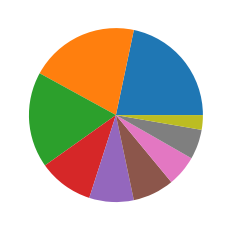

In [0]:
# Create a piechart of JobRole 
# You will need to find the counts of unique values in JobRole. 
JobRole_counts = df.JobRole.value_counts()
print(JobRole_counts)
plt.pie(JobRole_counts) #, labels=JobRole_counts.index.tolist())
plt.show()

